In [26]:
import pandas as pd
import numpy as np
import os

In [27]:
L = 4
T = 100
df1 = pd.read_csv("/Users/dannysilverston/scml20/Data/Log_100_4.csv")
df2 = df1.drop({'Unnamed: 0', 'game_index'}, axis = 1)
df2

,t,sold_quantity_0,unit_price_0,sold_quantity_1,unit_price_1,sold_quantity_2,unit_price_2,sold_quantity_3,unit_price_3
0,0,20,10.0,0,NaN,0,NaN,0,NaN
1,1,20,10.0,8,9.0,0,NaN,49,4.244898
2,2,20,10.0,8,9.0,7,26.000000,50,10.020000
3,3,20,10.0,15,10.0,13,46.000000,27,12.962963
4,4,20,10.0,17,9.0,7,46.714286,47,3.957447
...,...,...,...,...,...,...,...,...,...
16195,95,20,10.0,0,NaN,0,NaN,5,17.000000
16196,96,0,NaN,0,NaN,0,NaN,0,NaN
16197,97,0,NaN,0,NaN,0,NaN,0,NaN
16198,98,0,NaN,0,NaN,0,NaN,0,NaN


In [28]:
num_bins = 20
current_level = 2
current_time = 10

cols = {'sold_quantity_' + str(i) for i in range(0, L)} | {'unit_price_' + str(i) for i in range(0, L)}
curr_level_col_name = 'sold_quantity_' + str(current_level)
drop_cols = cols - {curr_level_col_name}

time_steps = {t for t in range(0, T)}
drop_time_steps = time_steps - {current_time}

# Select only the data that we need for this computation
df3 = df2.drop(drop_cols, axis = 1)
df4 = df3[df3.t == current_time]
df4

,t,sold_quantity_2
10,10,49
110,10,26
210,10,29
310,10,24
410,10,7
...,...,...
15710,10,19
15810,10,15
15910,10,0
16010,10,8


In [29]:
df5 = df4.reset_index(drop=True).drop('t', axis=1)
df5

,sold_quantity_2
0,49
1,26
2,29
3,24
4,7
...,...
157,19
158,15
159,0
160,8


In [30]:
df5['bin'] = pd.cut(df5['sold_quantity_' + str(current_level)], num_bins)
##df5

In [31]:
df6 = df5.groupby(['bin']).count()
##df6

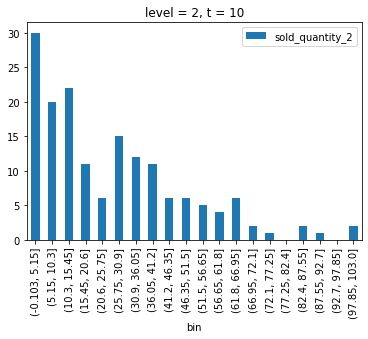

In [32]:
df6.plot(kind='bar', title='level = ' + str(current_level) + ', t = ' + str(current_time))

## MLE for Exponential Distribution with rate 1/t: Sample mean

In [33]:
total = df5['sold_quantity_'+ str(current_level)].sum()
print(total)

count = len(df5.index)
print(count)

sample_mean = total / count
print(sample_mean)

4218
162
26.037037037037038
